In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("olx_uylari.csv")

In [3]:
dataset.head()

,Link,Location,DataTime,Info,Prices,Xususiy biznes,Turar joyi,Xonalar,Umumiy maydoni,Yashash maydoni,...,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
0,https://www.olx.uz/d/obyavlenie/prodam-zh-k-pa...,Яккасарайский район,Сегодня в 15:23,Продам Ж/К Парисен новостройка,142000.0,Бизнес,Новостройки,3,92.0,85.0,...,1,1,1,1,1,0,1,1,1,0
1,https://www.olx.uz/d/obyavlenie/tashkent-siti-...,Шайхантахурский район,Сегодня в 15:22,Ташкент Сити Гарденс 3/3/8 110м2 G2 Блок Перег...,127000.0,Бизнес,Новостройки,3,110.0,0.0,...,1,1,1,1,1,0,1,1,1,0
2,https://www.olx.uz/d/obyavlenie/remont-dlya-se...,Чиланзарский район,Сегодня в 15:21,"Ремонт Для Себя!2в3/1/4""С обстановкой!Чиланзар...",46000.0,Бизнес,Вторичный рынок,2,45.0,0.0,...,1,1,1,1,1,0,1,1,1,0
3,https://www.olx.uz/d/obyavlenie/yakkasaray-nov...,Яккасарайский район,Сегодня в 15:21,Яккасарай /Новостройка/4 комнат/3 этаж //150 м2,240000.0,Бизнес,Новостройки,4,150.0,0.0,...,1,1,1,1,1,0,1,1,1,0
4,https://www.olx.uz/d/obyavlenie/odnokomnatnaya...,Алмазарский район,Сегодня в 15:20,Однокомнатная переделанная в 2х на Каракамыше...,35001.0,Бизнес,Вторичный рынок,1,39.0,0.0,...,1,1,1,1,1,0,1,1,1,0


### Barcha column larni ko'rsatish

In [4]:
pd.options.display.max_columns = 100

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5201 entries, 0 to 5200
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Link                 5201 non-null   object 
 1   Location             5201 non-null   object 
 2   DataTime             5201 non-null   object 
 3   Info                 5201 non-null   object 
 4   Prices               5201 non-null   float64
 5   Xususiy biznes       5201 non-null   object 
 6   Turar joyi           5201 non-null   object 
 7   Xonalar              5201 non-null   int64  
 8   Umumiy maydoni       5201 non-null   float64
 9   Yashash maydoni      5201 non-null   float64
 10  Oshxona maydoni      5201 non-null   float64
 11  Etaj                 5201 non-null   int64  
 12  Max etaj             5201 non-null   int64  
 13  Qurilish turi        4468 non-null   object 
 14  Rejasi               3376 non-null   object 
 15  Sanuzel              4219 non-null   o

### Umumiy maydoni oshxona va yotoqxonadan kichik satrlarni tuzatish

In [6]:
for i in dataset.index:
    if dataset["Umumiy maydoni"][i] <= dataset["Yashash maydoni"][i]:
        dataset["Umumiy maydoni"][i] = dataset["Umumiy maydoni"][i] + dataset["Yashash maydoni"][i]
    elif dataset["Umumiy maydoni"][i] <= dataset["Oshxona maydoni"][i]:
        dataset["Umumiy maydoni"][i] = dataset["Umumiy maydoni"][i] + dataset["Oshxona maydoni"][i]

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\731976993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Umumiy maydoni"][i] = dataset["Umumiy maydoni"][i] + dataset["Yashash maydoni"][i]
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\731976993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Umumiy maydoni"][i] = dataset["Umumiy maydoni"][i] + dataset["Oshxona maydoni"][i]


In [7]:
dataset.sort_values(by="Umumiy maydoni")

,Link,Location,DataTime,Info,Prices,Xususiy biznes,Turar joyi,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Qurilish turi,Rejasi,Sanuzel,Mebel,Remont,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
3032,https://www.olx.uz/d/obyavlenie/lyuks-navastro...,Яккасарайский район,Сегодня в 12:59,Люкс навастройка от ДРЕМ ХАУС,115000.0,Бизнес,Новостройки,3,1.0,0.0,0.0,8,9,Кирпичный,Раздельная,2 санузла и более,0,Авторский проект,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
81,https://www.olx.uz/d/obyavlenie/prodaetsya-kva...,Мирабадский район,Сегодня в 14:59,Продаётся квартира в мирабадскый районе,55000.0,Частное лицо,Вторичный рынок,3,1.0,0.0,0.0,2,4,Кирпичный,Смежная,NaN,1,Евроремонт,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0
1217,https://www.olx.uz/d/obyavlenie/chilanzar-24-k...,Учтепинский район,Сегодня в 16:14,Чиланзар 24 Квартал 1в2/1/5 Звоните Жасмина,34250.0,Бизнес,Вторичный рынок,1,2.0,0.0,0.0,1,5,Кирпичный,NaN,Совмещенный,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,https://www.olx.uz/d/obyavlenie/tashkent-siti-...,Шайхантахурский район,Сегодня в 13:49,Ташкент сити Gardens 3/7/9 92м2 с новым евро р...,200000.0,Бизнес,Новостройки,3,2.0,0.0,0.0,7,9,NaN,NaN,NaN,1,Авторский проект,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3261,https://www.olx.uz/d/obyavlenie/chilanzar-g9a-...,Чиланзарский район,Сегодня в 13:22,*Чиланзар* Г9а 2/2/4 кирпич,39500.0,Бизнес,Вторичный рынок,2,2.0,0.0,0.0,2,4,Кирпичный,Раздельная,Раздельный,1,Средний,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,https://www.olx.uz/d/obyavlenie/sokin-tjm-dan-...,Яшнабадский район,Сегодня в 08:20,Sokin tjm dan so'ngi honadonlarimizdan birini ...,434700000.0,Бизнес,Новостройки,4,455.0,103.0,0.0,7,7,Монолитный,Многоуровневая,Раздельный,0,Черновая отделка,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
4707,https://www.olx.uz/d/obyavlenie/hondoningizni-...,Яшнабадский район,Сегодня в 10:56,Hondoningizni ozizngiz yarating Azia housedan ...,13549.0,Бизнес,Новостройки,1,563.0,40.0,0.0,7,12,Монолитный,Многоуровневая,Раздельный,0,Черновая отделка,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
847,https://www.olx.uz/d/obyavlenie/zhk-inokobod-2...,Мирабадский район,Сегодня в 13:32,"ЖК:""Инокобод"" 2х-комн 56.4м2 балкон. разделка...",33800.0,Бизнес,Новостройки,2,564.0,0.0,0.0,2,7,Кирпичный,Раздельная,Раздельный,0,Черновая отделка,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0
908,https://www.olx.uz/d/obyavlenie/izzat-tjm-dan-...,Яшнабадский район,Сегодня в 15:22,Izzat tjm dan supper yangilik,293600000.0,Бизнес,Новостройки,3,578.0,74.0,0.0,3,12,Монолитный,Многоуровневая,Раздельный,0,Черновая отделка,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0


In [8]:
for i in dataset.index:
    if dataset["Prices"][i] > 1000000:
        dataset["Prices"][i] = dataset["Prices"][i] / 10000
    if dataset["Prices"][i] < 10000:
        dataset["Prices"][i] = dataset["Prices"][i] * dataset["Umumiy maydoni"][i]

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\1648550084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prices"][i] = dataset["Prices"][i] / 10000
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\1648550084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prices"][i] = dataset["Prices"][i] * dataset["Umumiy maydoni"][i]


In [9]:
dataset.describe()

,Prices,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Mebel,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
count,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.0,5201.000000,5201.000000,5201.000000,5201.0
mean,61581.382786,2.378197,71.179223,8.843943,1.469908,3.700250,5.933667,0.431648,0.362238,0.334167,0.162084,0.168429,0.188233,0.340704,0.162661,0.447799,0.706979,0.706979,0.724668,0.725245,0.725822,0.698904,0.698904,0.698904,0.711594,0.711594,0.712748,0.0,0.715439,0.715439,0.713709,0.0
std,43963.849007,1.030411,43.699916,25.490466,6.312156,2.275864,2.835968,0.495354,0.480693,0.471744,0.368563,0.374283,0.390936,0.473991,0.369092,0.497315,0.455192,0.455192,0.446724,0.446434,0.446142,0.458778,0.458778,0.458778,0.453065,0.453065,0.452524,0.0,0.451248,0.451248,0.452071,0.0
min,10200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,38000.000000,2.000000,47.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,49000.000000,2.000000,60.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0
75%,67500.000000,3.000000,80.000000,0.000000,0.000000,5.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0
max,799920.000000,11.000000,600.000000,250.000000,150.000000,24.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Pricesni matplotlib bilan chizish

In [10]:
prices = dataset["Prices"]
ranges = np.arange(len(dataset))

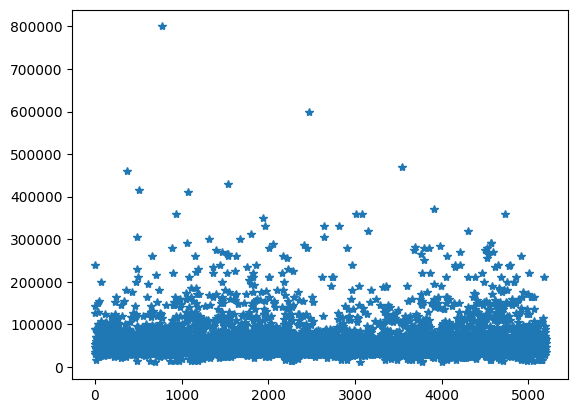

In [11]:
plt.plot(ranges,prices,"*")

### Tumanlarni encode qilish

In [12]:
ser = []
uch = []
yash = []
bek = []
olm = []
yak = []
mu = []
mir = []
chil = []
shay = []
yun = []
umumiy = []
for i in dataset.index:
    if dataset["Location"][i] == "Сергелийский район":
        ser.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Учтепинский район":
        uch.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Яшнабадский район":
        yash.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Бектемирский район":
        bek.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Алмазарский район":
        olm.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Яккасарайский район":
        yak.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Мирзо-Улугбекский район":
        mu.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Мирабадский район":
        mir.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Чиланзарский район":
        chil.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Шайхантахурский район":
        shay.append(dataset["Prices"][i])
    elif dataset["Location"][i] == "Юнусабадский район":
        yun.append(dataset["Prices"][i])
print(f"Sergeli:\t {np.mean(ser)}\nUchtepa:\t {np.mean(uch)}\nYashnaobod: \t{np.mean(yash)}\nBektemir:\t {np.mean(bek)}\nOlmazor:\t {np.mean(olm)}\nYakkasaroy:\t {np.mean(yak)}\nMirzo Ulug'bek: {np.mean(mu)}\nMirobod:\t {np.mean(mir)}\nChilonzor: \t{np.mean(chil)}\nShayxontoxur:\t {np.mean(shay)}\nYunusobod:\t {np.mean(yun)}")

Sergeli:	 41266.901639344265
Uchtepa:	 46212.91764705882
Yashnaobod: 	52810.141599016395
Bektemir:	 35215.294117647056
Olmazor:	 65084.1835443038
Yakkasaroy:	 83597.92520245399
Mirzo Ulug'bek: 66046.97891963109
Mirobod:	 96506.76009367681
Chilonzor: 	45716.58755506608
Shayxontoxur:	 80080.55428571429
Yunusobod:	 62988.285457516344


In [13]:
a = [41266.901639344265,46212.91764705882,52810.141599016395,35215.294117647056,65084.1835443038,83597.92520245399,66046.97891963109,96506.76009367681,45716.58755506608,80080.55428571429,62988.285457516344]
print(np.sort(a))

[35215.29411765 41266.90163934 45716.58755507 46212.91764706
 52810.14159902 62988.28545752 65084.1835443  66046.97891963
 80080.55428571 83597.92520245 96506.76009368]


* 1-Bektemir
* 2-Sergeli
* 3-Chilonzor
* 4-Uchtepa
* 5-Yashnaobod
* 6-Yunusobod
* 7-Olmazor
* 8-Mirzo Ulug'bek
* 9-Shayxontoxur
* 10-Yakkasaroy
* 11-Mirobod

In [14]:
dataset["Location"].unique()

array(['Яккасарайский район', 'Шайхантахурский район',
       'Чиланзарский район', 'Алмазарский район',
       'Мирзо-Улугбекский район', 'Юнусабадский район',
       'Мирабадский район', 'Бектемирский район', 'Яшнабадский район',
       'Сергелийский район', 'Учтепинский район'], dtype=object)

In [15]:
for i in dataset.index:
    if dataset["Location"][i] == "Сергелийский район":
        dataset["Location"][i] = 2
    elif dataset["Location"][i] == "Учтепинский район":
        dataset["Location"][i] = 4
    elif dataset["Location"][i] == "Яшнабадский район":
        dataset["Location"][i] = 5
    elif dataset["Location"][i] == "Бектемирский район":
        dataset["Location"][i] = 1
    elif dataset["Location"][i] == "Алмазарский район":
        dataset["Location"][i] = 7
    elif dataset["Location"][i] == "Яккасарайский район":
        dataset["Location"][i] = 10
    elif dataset["Location"][i] == "Мирзо-Улугбекский район":
        dataset["Location"][i] = 8
    elif dataset["Location"][i] == "Мирабадский район":
        dataset["Location"][i] = 11
    elif dataset["Location"][i] == "Чиланзарский район":
        dataset["Location"][i] = 3
    elif dataset["Location"][i] == "Шайхантахурский район":
        dataset["Location"][i] = 9
    elif dataset["Location"][i] == "Юнусабадский район":
        dataset["Location"][i] = 6

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\2050699683.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Location"][i] = 10
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\2050699683.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Location"][i] = 9
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\2050699683.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Location"][i] = 3
C:\Users\DNS\AppData\Loc

In [16]:
dataset["Location"] = dataset["Location"].astype("int8")

In [17]:
dataset["Location"].unique()

array([10,  9,  3,  7,  8,  6, 11,  1,  5,  2,  4], dtype=int8)

### RegEx bilan Info usunidan kerakli ma'lumotlarni topib o'rniga qo'yish

In [18]:
dataset.isna().sum()

Link                      0
Location                  0
DataTime                  0
Info                      0
Prices                    0
Xususiy biznes            0
Turar joyi                0
Xonalar                   0
Umumiy maydoni            0
Yashash maydoni           0
Oshxona maydoni           0
Etaj                      0
Max etaj                  0
Qurilish turi           733
Rejasi                 1825
Sanuzel                 982
Mebel                     0
Remont                  803
Internet                  0
Telefon                   0
Televizor                 0
Muzlatgich                0
Konditsioner              0
Kabelli TV                0
Kir mashina               0
Oshxona                   0
Shifoxona                 0
Poliklinika               0
Bolalar maydonchasi       0
Bolalar bogchasi          0
Bekat                     0
Park                      0
Kongilochar joy           0
Yashil maydon             0
Restoran                  0
Kafe                

In [19]:
dataset["Info"][200]

'Чилонзор 22-кв Кирпичный 3/1/4  Балкон 2/6 СРОЧНО'

In [20]:
s = 0
arr = []
for i in dataset.index:
    if re.findall(r"((К|к)ирпич)", dataset["Info"][i]):
        s += 1
        arr.append(i)
print(s)
print(arr)

540
[10, 11, 13, 63, 67, 77, 106, 118, 120, 137, 148, 150, 167, 200, 205, 215, 226, 229, 233, 242, 249, 286, 299, 314, 327, 331, 333, 346, 366, 375, 386, 398, 408, 419, 421, 424, 429, 433, 438, 445, 449, 450, 466, 490, 495, 503, 509, 524, 532, 534, 536, 537, 542, 547, 550, 551, 561, 562, 567, 572, 579, 594, 596, 599, 618, 621, 626, 632, 634, 637, 640, 657, 664, 666, 684, 687, 690, 692, 703, 705, 710, 713, 716, 720, 730, 732, 735, 740, 751, 758, 765, 767, 772, 774, 783, 791, 792, 798, 812, 816, 817, 819, 822, 829, 837, 838, 851, 865, 873, 887, 890, 894, 906, 945, 956, 959, 967, 978, 989, 993, 1000, 1020, 1033, 1037, 1039, 1042, 1058, 1062, 1065, 1066, 1070, 1078, 1082, 1084, 1092, 1099, 1101, 1115, 1132, 1137, 1202, 1213, 1218, 1225, 1229, 1239, 1244, 1252, 1258, 1262, 1272, 1276, 1278, 1294, 1302, 1303, 1313, 1314, 1320, 1324, 1325, 1334, 1336, 1346, 1348, 1370, 1377, 1382, 1389, 1400, 1407, 1411, 1414, 1416, 1433, 1443, 1458, 1485, 1509, 1511, 1514, 1515, 1533, 1566, 1592, 1594, 1596,

In [21]:
dataset["Qurilish turi"].unique()

array(['Кирпичный', 'Панельный', nan, 'Монолитный', 'Блочный',
       'Деревянный'], dtype=object)

In [22]:
for i in dataset.index:
    if re.findall(r"((К|к)ирпич)", dataset["Info"][i]):
        dataset["Qurilish turi"][i] = "Кирпичный"
    elif re.findall(r"((П|п)анел)", dataset["Info"][i]):
        dataset["Qurilish turi"][i] = "Панельный"
    elif re.findall(r"((М|м)онолит)", dataset["Info"][i]):
        dataset["Qurilish turi"][i] = "Монолитный"
    elif re.findall(r"((Б|б)лоч)", dataset["Info"][i]):
        dataset["Qurilish turi"][i] = "Блочный"
    elif re.findall(r"((Д|д)еревян)", dataset["Info"][i]):
        dataset["Qurilish turi"][i] = "Деревянный"

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\1109174134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Qurilish turi"][i] = "Кирпичный"
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\1109174134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Qurilish turi"][i] = "Панельный"
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\1109174134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Qurilish turi"][

In [23]:
dataset.isna().sum()

Link                      0
Location                  0
DataTime                  0
Info                      0
Prices                    0
Xususiy biznes            0
Turar joyi                0
Xonalar                   0
Umumiy maydoni            0
Yashash maydoni           0
Oshxona maydoni           0
Etaj                      0
Max etaj                  0
Qurilish turi           699
Rejasi                 1825
Sanuzel                 982
Mebel                     0
Remont                  803
Internet                  0
Telefon                   0
Televizor                 0
Muzlatgich                0
Konditsioner              0
Kabelli TV                0
Kir mashina               0
Oshxona                   0
Shifoxona                 0
Poliklinika               0
Bolalar maydonchasi       0
Bolalar bogchasi          0
Bekat                     0
Park                      0
Kongilochar joy           0
Yashil maydon             0
Restoran                  0
Kafe                

In [24]:
s = 0
arr = []
for i in dataset.index:
    if re.findall(r"((Р|р)аздел)", dataset["Info"][i]):
        s += 1
        arr.append(i)
print(s)
print(arr)

228
[7, 94, 95, 101, 110, 146, 168, 178, 185, 189, 192, 198, 241, 249, 252, 270, 318, 374, 399, 400, 408, 434, 440, 451, 499, 521, 523, 535, 538, 543, 544, 548, 553, 565, 594, 597, 617, 626, 636, 640, 656, 665, 684, 749, 760, 764, 797, 840, 847, 852, 855, 863, 886, 890, 904, 944, 1038, 1040, 1128, 1200, 1208, 1228, 1242, 1265, 1266, 1308, 1328, 1330, 1333, 1337, 1350, 1358, 1372, 1449, 1458, 1474, 1479, 1488, 1495, 1498, 1499, 1546, 1547, 1548, 1559, 1560, 1562, 1580, 1590, 1599, 1615, 1616, 1619, 1625, 1650, 1656, 1668, 1696, 1706, 1719, 1727, 1747, 1770, 1800, 1836, 1987, 2006, 2039, 2049, 2054, 2079, 2109, 2200, 2221, 2413, 2445, 2454, 2458, 2489, 2521, 2542, 2572, 2577, 2629, 2683, 2685, 2689, 2699, 2729, 2742, 2748, 2751, 2762, 2779, 2800, 2846, 2956, 2961, 3014, 3016, 3043, 3061, 3066, 3072, 3154, 3189, 3211, 3243, 3259, 3265, 3296, 3310, 3354, 3366, 3375, 3438, 3450, 3494, 3527, 3533, 3555, 3563, 3609, 3630, 3635, 3690, 3707, 3753, 3756, 3781, 3817, 3838, 3857, 3862, 3889, 3907,

In [25]:
dataset["Rejasi"].unique()

array(['Раздельная', 'Смежная', nan, 'Смежно-раздельная', 'Студия',
       'Многоуровневая', 'Малосемейка', 'Пентхаус'], dtype=object)

In [26]:
for i in dataset.index:
    if re.findall(r"((С|с)межно-раздельная)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Смежно-раздельная"
    elif re.findall(r"((Р|р)аздел)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Раздельная"
    elif re.findall(r"((С|с)межная)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Смежная"
    elif re.findall(r"((С|с)тудия)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Студия"
    elif re.findall(r"((М|м)ногоуров)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Многоуровневая"
    elif re.findall(r"((М|м)малосемейка)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Малосемейка"
    elif re.findall(r"((П|п)пентхаус)", dataset["Info"][i]):
        dataset["Rejasi"][i] = "Пентхаус"

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\3576426164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Rejasi"][i] = "Раздельная"
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\3576426164.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Rejasi"][i] = "Студия"
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\3576426164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Rejasi"][i] = "Смежная"


In [31]:
dataset.isna().sum()

Link                      0
Location                  0
DataTime                  0
Info                      0
Prices                    0
Xususiy biznes            0
Turar joyi                0
Xonalar                   0
Umumiy maydoni            0
Yashash maydoni           0
Oshxona maydoni           0
Etaj                      0
Max etaj                  0
Qurilish turi           699
Rejasi                 1798
Sanuzel                 982
Mebel                     0
Remont                  803
Internet                  0
Telefon                   0
Televizor                 0
Muzlatgich                0
Konditsioner              0
Kabelli TV                0
Kir mashina               0
Oshxona                   0
Shifoxona                 0
Poliklinika               0
Bolalar maydonchasi       0
Bolalar bogchasi          0
Bekat                     0
Park                      0
Kongilochar joy           0
Yashil maydon             0
Restoran                  0
Kafe                

In [27]:
dataset["Remont"].unique()

array(['Евроремонт', 'Черновая отделка', 'Авторский проект', nan,
       'Средний', 'Требует ремонта', 'Предчистовая отделка'], dtype=object)

In [34]:
for i in dataset.index:
    if re.findall(r"((Е|е)вро)", dataset["Info"][i]):
        dataset["Remont"][i] = "Евроремонт"
    elif re.findall(r"((Б|б)ез ремонт)", dataset["Info"][i]):
        dataset["Remont"][i] = "Требует ремонта"
    elif re.findall(r"((С|с)редний)", dataset["Info"][i]):
        dataset["Remont"][i] = "Средний"
    elif re.findall(r"((Ч|ч)ерновая)", dataset["Info"][i]):
        dataset["Remont"][i] = "Черновая отделка"
    elif re.findall(r"((А|а)вторский)", dataset["Info"][i]):
        dataset["Remont"][i] = "Авторский проект"
    elif re.findall(r"((П|п)редчистовая)", dataset["Info"][i]):
        dataset["Remont"][i] = "Предчистовая отделкат"

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\623845536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Remont"][i] = "Средний"
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\623845536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Remont"][i] = "Требует ремонта"
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\623845536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Remont"][i] = "Евроремонт"
C:

In [35]:
dataset.isna().sum()

Link                      0
Location                  0
DataTime                  0
Info                      0
Prices                    0
Xususiy biznes            0
Turar joyi                0
Xonalar                   0
Umumiy maydoni            0
Yashash maydoni           0
Oshxona maydoni           0
Etaj                      0
Max etaj                  0
Qurilish turi           699
Rejasi                 1798
Sanuzel                 982
Mebel                     0
Remont                  755
Internet                  0
Telefon                   0
Televizor                 0
Muzlatgich                0
Konditsioner              0
Kabelli TV                0
Kir mashina               0
Oshxona                   0
Shifoxona                 0
Poliklinika               0
Bolalar maydonchasi       0
Bolalar bogchasi          0
Bekat                     0
Park                      0
Kongilochar joy           0
Yashil maydon             0
Restoran                  0
Kafe                

In [38]:
dataset[dataset["Etaj"]>dataset["Max etaj"]]

,Link,Location,DataTime,Info,Prices,Xususiy biznes,Turar joyi,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Qurilish turi,Rejasi,Sanuzel,Mebel,Remont,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
127,https://www.olx.uz/d/obyavlenie/chilanzar-7-kv...,3,Сегодня в 14:48,"Чиланзар-7 кв"" Оптовка""2/2/4""ПАНЕЛЬ""Не торец""Б...",39500.0,Бизнес,Вторичный рынок,2,45.0,0.0,0.0,4,2,Панельный,Смежная,Раздельный,1,Средний,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
2256,https://www.olx.uz/d/obyavlenie/qora-qamish-2l...,7,Сегодня в 09:40,Qora qamish 2l5 Muxbir 3l1l4,79500.0,Бизнес,Вторичный рынок,1,113.0,0.0,0.0,4,1,Кирпичный,NaN,NaN,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2318,https://www.olx.uz/d/obyavlenie/ne-makler-prod...,10,Сегодня в 09:53,Не маклер !Продажа 4/3/5 Кушбеги. 102 ...,75000.0,Бизнес,Вторичный рынок,4,102.0,0.0,0.0,3,2,NaN,NaN,NaN,0,Евроремонт,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
2481,https://www.olx.uz/d/obyavlenie/ne-makler-prod...,7,Сегодня в 10:50,Не маклер !Продажа 3/1/4 Каракамыш-1/3. 7...,75000.0,Бизнес,Вторичный рынок,3,77.0,0.0,0.0,5,4,NaN,NaN,NaN,0,Евроремонт,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
3417,https://www.olx.uz/d/obyavlenie/srochno-2-8-8-...,8,Сегодня в 15:52,Срочно 2/8 / 8 Паркентский коробка +12 мансарда,39500.0,Бизнес,Новостройки,2,60.0,0.0,0.0,8,4,Кирпичный,NaN,Совмещенный,0,Требует ремонта,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3938,https://www.olx.uz/d/obyavlenie/prodayu-1-komn...,3,Сегодня в 06:19,Продаю 1 комнатную квартиру без балкона Чиланз...,31500.0,Бизнес,Вторичный рынок,1,30.0,0.0,0.0,7,4,NaN,NaN,Раздельный,0,Средний,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
4574,https://www.olx.uz/d/obyavlenie/chilanzar-8kva...,3,Сегодня в 10:16,Чиланзар 8 квартал 2³/2/4 Ремонт новый заходи ...,48000.0,Бизнес,Вторичный рынок,2,47.0,36.0,5.0,4,2,Панельный,Смежно-раздельная,Совмещенный,1,Авторский проект,1,1,0,0,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0
4598,https://www.olx.uz/d/obyavlenie/nurafshon-koch...,7,Сегодня в 10:36,Nurafshon kocha novastroyka 3 hona,58000.0,Бизнес,Новостройки,3,78.0,0.0,0.0,7,6,Кирпичный,Раздельная,Раздельный,1,Средний,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0


In [39]:
dataset[dataset["Etaj"]>dataset["Max etaj"]].index

Int64Index([127, 2256, 2318, 2481, 3417, 3938, 4574, 4598], dtype='int64')

* Almashtirish
127,2256,3938,4574,4598
* O'zgartirish
2318 - (Max etaj=5), 2481 - (Etaj=1), 3417 - (Max etaj=8)

In [41]:
arr = [127,2256,3938,4574,4598]
for i in arr:
    dataset["Etaj"][i], dataset["Max etaj"][i] = dataset["Max etaj"][i], dataset["Etaj"][i]
    print(i)

127
2256
3938
4574
4598


C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\2058953479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Etaj"][i], dataset["Max etaj"][i] = dataset["Max etaj"][i], dataset["Etaj"][i]


In [42]:
dataset["Max etaj"][2318] = 5
dataset["Max etaj"][3417] = 8
dataset["Etaj"][2481] = 1

C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\3668978656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Max etaj"][2318] = 5
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\3668978656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Max etaj"][3417] = 8
C:\Users\DNS\AppData\Local\Temp\ipykernel_9196\3668978656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Etaj"][2481] = 1


### Dataset son qiymatlarining statistikasi

In [44]:
dataset.describe()

,Location,Prices,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Mebel,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
count,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.0,5201.000000,5201.000000,5201.000000,5201.0
mean,6.014805,61581.382786,2.378197,71.179223,8.843943,1.469908,3.697366,5.937127,0.431648,0.362238,0.334167,0.162084,0.168429,0.188233,0.340704,0.162661,0.447799,0.706979,0.706979,0.724668,0.725245,0.725822,0.698904,0.698904,0.698904,0.711594,0.711594,0.712748,0.0,0.715439,0.715439,0.713709,0.0
std,2.947746,43963.849007,1.030411,43.699916,25.490466,6.312156,2.275947,2.833944,0.495354,0.480693,0.471744,0.368563,0.374283,0.390936,0.473991,0.369092,0.497315,0.455192,0.455192,0.446724,0.446434,0.446142,0.458778,0.458778,0.458778,0.453065,0.453065,0.452524,0.0,0.451248,0.451248,0.452071,0.0
min,1.000000,10200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,3.000000,38000.000000,2.000000,47.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,6.000000,49000.000000,2.000000,60.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0
75%,8.000000,67500.000000,3.000000,80.000000,0.000000,0.000000,5.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0
max,11.000000,799920.000000,11.000000,600.000000,250.000000,150.000000,24.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Datasetdan keraksiz column larni o'chirish

In [45]:
uchirish = ["Link","DataTime", "Info"]

In [46]:
dataset.drop(uchirish, axis=1, inplace=True)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5201 entries, 0 to 5200
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             5201 non-null   int8   
 1   Prices               5201 non-null   float64
 2   Xususiy biznes       5201 non-null   object 
 3   Turar joyi           5201 non-null   object 
 4   Xonalar              5201 non-null   int64  
 5   Umumiy maydoni       5201 non-null   float64
 6   Yashash maydoni      5201 non-null   float64
 7   Oshxona maydoni      5201 non-null   float64
 8   Etaj                 5201 non-null   int64  
 9   Max etaj             5201 non-null   int64  
 10  Qurilish turi        4502 non-null   object 
 11  Rejasi               3403 non-null   object 
 12  Sanuzel              4219 non-null   object 
 13  Mebel                5201 non-null   int64  
 14  Remont               4446 non-null   object 
 15  Internet             5201 non-null   i

# Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
lb = LabelEncoder()

In [50]:
dataset["Xususiy biznes"].unique()

array(['Бизнес', 'Частное лицо'], dtype=object)

In [75]:
dataset["Xususiy biznes"] = lb.fit_transform(dataset["Xususiy biznes"])

In [76]:
dataset["Turar joyi"].unique()

array(['Новостройки', 'Вторичный рынок'], dtype=object)

In [79]:
dataset["Turar joyi"] = lb.fit_transform(dataset["Turar joyi"])

In [77]:
dataset["Qurilish turi"].unique()

array([2, 4, 5, 3, 0, 1], dtype=int64)

In [65]:
dataset["Qurilish turi"] = lb.fit_transform(dataset["Qurilish turi"])

In [54]:
dataset["Rejasi"].unique() # LabelEncoder

array(['Раздельная', 'Смежная', nan, 'Смежно-раздельная', 'Студия',
       'Многоуровневая', 'Малосемейка', 'Пентхаус'], dtype=object)

In [68]:
dataset["Rejasi"] = lb.fit_transform(dataset["Rejasi"])

In [55]:
dataset["Sanuzel"].unique() # LabelEncoder

array(['2 санузла и более', 'Раздельный', nan, 'Совмещенный'],
      dtype=object)

In [69]:
dataset["Sanuzel"] = lb.fit_transform(dataset["Sanuzel"])

In [56]:
dataset["Remont"].unique() # LabelEncoder

array(['Евроремонт', 'Черновая отделка', 'Авторский проект', nan,
       'Средний', 'Требует ремонта', 'Предчистовая отделка'], dtype=object)

In [70]:
dataset["Remont"] = lb.fit_transform(dataset["Remont"])

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5201 entries, 0 to 5200
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             5201 non-null   int8   
 1   Prices               5201 non-null   float64
 2   Xususiy biznes       5201 non-null   int32  
 3   Turar joyi           5201 non-null   int32  
 4   Xonalar              5201 non-null   int64  
 5   Umumiy maydoni       5201 non-null   float64
 6   Yashash maydoni      5201 non-null   float64
 7   Oshxona maydoni      5201 non-null   float64
 8   Etaj                 5201 non-null   int64  
 9   Max etaj             5201 non-null   int64  
 10  Qurilish turi        5201 non-null   int64  
 11  Rejasi               5201 non-null   int32  
 12  Sanuzel              5201 non-null   int32  
 13  Mebel                5201 non-null   int64  
 14  Remont               5201 non-null   int32  
 15  Internet             5201 non-null   i

### Takrorlangan qiymatlarni o'chirish

In [81]:
dataset.drop_duplicates(inplace=True)

# Kamchiliklarni to'g'irlash

In [251]:
dataset.head()

,Location,Prices,Xususiy biznes,Turar joyi,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Qurilish turi,Rejasi,Sanuzel,Mebel,Remont,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
0,5,142000.0,1,1,3,92.0,85.0,12.0,4,8,4,3,2,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
1,9,127000.0,1,1,3,110.0,0.0,0.0,3,8,4,3,2,0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
2,8,46000.0,1,0,2,45.0,0.0,0.0,1,4,2,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
3,5,240000.0,1,1,4,150.0,0.0,0.0,3,8,4,3,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
4,4,35001.0,1,0,1,39.0,0.0,0.0,4,5,2,3,0,0,5,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0


In [252]:
dataset.describe()

,Prices,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Mebel,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
count,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.0,5010.000000,5010.000000,5010.000000,5010.0
mean,61734.983807,2.386427,66.671764,9.093283,1.512872,3.700599,5.947106,0.432934,0.360878,0.331936,0.162475,0.169062,0.189421,0.338723,0.163273,0.449301,0.701397,0.701397,0.719760,0.720359,0.720958,0.693014,0.693014,0.693014,0.706188,0.706188,0.707385,0.0,0.710180,0.710180,0.708383,0.0
std,43350.123146,1.036360,36.870675,25.842352,6.418268,2.279567,2.852219,0.495531,0.480303,0.470955,0.368923,0.374844,0.391882,0.473323,0.369652,0.497473,0.457691,0.457691,0.449161,0.448867,0.448573,0.461290,0.461290,0.461290,0.455553,0.455553,0.455008,0.0,0.453724,0.453724,0.454552,0.0
min,5200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,38000.000000,2.000000,46.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,49000.000000,2.000000,60.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0
75%,68000.000000,3.000000,76.000000,0.000000,0.000000,5.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0
max,599000.000000,11.000000,600.000000,250.000000,150.000000,24.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Datasetni csv faylga saqlab olish

In [84]:
dataset.to_csv("yangi_olx.csv", index=False)

# Data o'qitish

### Train_test_split

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [90]:
lr = LinearRegression()

In [97]:
data = pd.read_csv("yangi_olx.csv")

In [98]:
data.head()

,Location,Prices,Xususiy biznes,Turar joyi,Xonalar,Umumiy maydoni,Yashash maydoni,Oshxona maydoni,Etaj,Max etaj,Qurilish turi,Rejasi,Sanuzel,Mebel,Remont,Internet,Telefon,Televizor,Muzlatgich,Konditsioner,Kabelli TV,Kir mashina,Oshxona,Shifoxona,Poliklinika,Bolalar maydonchasi,Bolalar bogchasi,Bekat,Park,Kongilochar joy,Yashil maydon,Restoran,Kafe,Avtoturargoh,Bozor,Supermarket,Dukon,Maktab,Metro
0,10,142000.0,0,1,3,92.0,85.0,12.0,4,8,2,3,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
1,9,127000.0,0,1,3,110.0,0.0,0.0,3,8,2,3,0,0,5,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
2,3,46000.0,0,0,2,45.0,0.0,0.0,1,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
3,10,240000.0,0,1,4,150.0,0.0,0.0,3,8,2,3,3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
4,7,35001.0,0,0,1,39.0,0.0,0.0,4,5,4,7,2,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0


In [99]:
x_train_test = data[["Location","Xususiy biznes","Turar joyi","Xonalar","Umumiy maydoni","Yashash maydoni","Oshxona maydoni","Etaj","Max etaj", "Qurilish turi",	"Rejasi",	"Sanuzel",	"Mebel",	"Remont",	"Internet",	"Telefon",	"Televizor",	"Muzlatgich",	"Konditsioner",	"Kabelli TV",	"Kir mashina",	"Oshxona",	"Shifoxona",	"Poliklinika",	"Bolalar maydonchasi",	"Bolalar bogchasi",	"Bekat",	"Park",	"Kongilochar joy",	"Yashil maydon",	"Restoran",	"Kafe",	"Avtoturargoh",	"Bozor",	"Supermarket",	"Dukon",	"Maktab",	"Metro"]]
y_train_test = data[["Prices"]]
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.20, random_state=42)

In [100]:
len(x_test)

999

In [102]:
len(y_test)

999

In [101]:
len(x_train)

3995

In [103]:
len(y_train)

3995

In [104]:
lr.fit(x_train,y_train)

LinearRegression()

In [105]:
lr.coef_

array([[ 2661.55016521, -1556.48324642, 21136.77490538,  8282.84980586,
          495.92014815,  -261.55349278,   227.68544545, -1437.39793602,
          676.4524495 ,  -557.51227416,  2126.81242669, -1273.01186042,
        11618.29360411, -2009.28212358, -8046.16919932,  5806.62032652,
        -3259.83664463,  1622.36414137,  4302.58777291,  2930.93371715,
         3112.42111442,  -329.62138551,  1390.18915578,  1390.18915578,
         2113.74854087, -2922.37474336, -2180.32462709,  2982.22602398,
          716.94277989,  2982.22602398,   442.89563863,   442.89563863,
         -253.67247045,     0.        , -3578.1445917 , -3578.1445917 ,
        -2979.10181897,     0.        ]])

In [106]:
lr.intercept_

array([-14175.14951858])

In [108]:
lr.predict(x_test)

array([[ 23929.11611018],
       [ 60785.98021197],
       [ 79436.94483193],
       [104173.50291463],
       [ 26845.18289307],
       [ 82395.7885499 ],
       [ 45904.82461046],
       [ 16370.23076255],
       [ 65533.16782079],
       [ 38724.83356215],
       [ 29337.37648673],
       [ 21670.91668863],
       [ 37975.61469801],
       [ 30909.63177443],
       [ 98250.8470179 ],
       [ 53873.75549257],
       [117033.57048006],
       [ 92284.25121659],
       [115689.33255132],
       [ 62951.84313207],
       [ 74555.39914708],
       [ 45738.14932256],
       [ 24442.52392158],
       [ 56782.65106156],
       [ 52398.40635525],
       [ 84630.06715548],
       [  7680.43236927],
       [ 62805.7454091 ],
       [ 53098.4269729 ],
       [ 55354.47719177],
       [ 84614.55139166],
       [ 75817.56535528],
       [ 37349.049024  ],
       [ 75688.89931651],
       [ 49049.61098695],
       [100529.57755547],
       [ 74116.21231434],
       [ 44388.59353081],
       [ 574

In [110]:
lr.score(x_test,y_test)

0.5409118558407702

# Standartizatsiya orqali

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
st = StandardScaler()

In [125]:
st.fit_transform(x_train)

array([[-1.03696449, -0.25225289, -0.50742054, ...,  0.63849939,
         0.64160796,  0.        ],
       [-1.03696449, -0.25225289, -0.50742054, ..., -1.56617222,
        -1.55858415,  0.        ],
       [-0.35666674, -0.25225289,  1.97075191, ...,  0.63849939,
         0.64160796,  0.        ],
       ...,
       [ 0.66377988, -0.25225289, -0.50742054, ...,  0.63849939,
         0.64160796,  0.        ],
       [ 0.66377988, -0.25225289, -0.50742054, ..., -1.56617222,
        -1.55858415,  0.        ],
       [-1.37711336, -0.25225289,  1.97075191, ...,  0.63849939,
         0.64160796,  0.        ]])

In [126]:
st.fit_transform(x_test)

array([[ 1.36033471, -0.23904572, -0.50187618, ...,  0.64110604,
         0.64266066,  0.        ],
       [-1.03403243, -0.23904572,  1.99252334, ..., -1.55980438,
        -1.55603113,  0.        ],
       [-1.03403243, -0.23904572, -0.50187618, ...,  0.64110604,
         0.64266066,  0.        ],
       ...,
       [ 0.33417737,  4.18330013, -0.50187618, ..., -1.55980438,
         0.64266066,  0.        ],
       [-0.00787508, -0.23904572, -0.50187618, ..., -1.55980438,
        -1.55603113,  0.        ],
       [ 0.67622982, -0.23904572, -0.50187618, ...,  0.64110604,
         0.64266066,  0.        ]])

In [127]:
lr.fit(x_train,y_train)

LinearRegression()

In [128]:
lr.coef_

array([[ 2661.55016521, -1556.48324642, 21136.77490538,  8282.84980586,
          495.92014815,  -261.55349278,   227.68544545, -1437.39793602,
          676.4524495 ,  -557.51227416,  2126.81242669, -1273.01186042,
        11618.29360411, -2009.28212358, -8046.16919932,  5806.62032652,
        -3259.83664463,  1622.36414137,  4302.58777291,  2930.93371715,
         3112.42111442,  -329.62138551,  1390.18915578,  1390.18915578,
         2113.74854087, -2922.37474336, -2180.32462709,  2982.22602398,
          716.94277989,  2982.22602398,   442.89563863,   442.89563863,
         -253.67247045,     0.        , -3578.1445917 , -3578.1445917 ,
        -2979.10181897,     0.        ]])

In [129]:
lr.intercept_

array([-14175.14951858])

In [130]:
lr.predict(x_test)

array([[ 23929.11611018],
       [ 60785.98021197],
       [ 79436.94483193],
       [104173.50291463],
       [ 26845.18289307],
       [ 82395.7885499 ],
       [ 45904.82461046],
       [ 16370.23076255],
       [ 65533.16782079],
       [ 38724.83356215],
       [ 29337.37648673],
       [ 21670.91668863],
       [ 37975.61469801],
       [ 30909.63177443],
       [ 98250.8470179 ],
       [ 53873.75549257],
       [117033.57048006],
       [ 92284.25121659],
       [115689.33255132],
       [ 62951.84313207],
       [ 74555.39914708],
       [ 45738.14932256],
       [ 24442.52392158],
       [ 56782.65106156],
       [ 52398.40635525],
       [ 84630.06715548],
       [  7680.43236927],
       [ 62805.7454091 ],
       [ 53098.4269729 ],
       [ 55354.47719177],
       [ 84614.55139166],
       [ 75817.56535528],
       [ 37349.049024  ],
       [ 75688.89931651],
       [ 49049.61098695],
       [100529.57755547],
       [ 74116.21231434],
       [ 44388.59353081],
       [ 574

In [131]:
lr.score(x_test,y_test)

0.5409118558407702